# Figures 1a, and 1b, supplementary 3, and SNP stats: H5N1 within-host variant plots and summary statistics

June 6, 2019

This notebook contains code for producing the following figures and analyses:

**1. Figure 1:** This plot shows all SNPs > 1% in all human and duck samples, faceted by gene. 

**2. Supplemental figure 1:** The same as figure 1, but faceted by gene and sample, so each sample's SNPs are plotted independently. 

**3. Figure 2:** A frequency spectrum showing the proportion of the total SNPs that fall into each frequency bin (1-10%, 10-20%, etc...).

**4. SNPs statistics:** Calculations for the mean SNP frequency for birds and humans, and the mean number of SNPs per sample for birds and humans, total number of SNPs called, etc.. 

In [2]:
import sys, subprocess, glob, os, shutil, re, importlib, Bio
from subprocess import call
from Bio import SeqIO
import pandas as pd
import numpy as np
from scipy import stats
import rpy2
%load_ext rpy2.ipython 

In [3]:
# define colors 

# blue/red scheme 1 (desaturated)
human_color = "#C75643"
duck_color = "#545AB7"


# blue/red scheme 1 (desaturated)
duck_nonsyn_color = "#545AB7"
duck_syn_color = "#98B4DA"
human_nonsyn_color = "#C75643"
human_syn_color = "#E6B692"

In [4]:
# variant calls file to load in
variant_calls = "/Users/lmoncla/src/h5n1-cambodia/data/within-host-variants-1%.txt"

## Figure 1a: All within-host SNPs 

In [5]:
snps_df = pd.read_csv(variant_calls, sep='\t', header='infer')
snps_df.head()

,sampleid,sample,gene,reference_position,reference_allele,variant_allele,coding_region_change,synonymous_nonsynonymous,frequency(%),frequency,Unnamed: 10
0,AJJ9KL706F510_A_duck_Cambodia_381W11M4_2013_H5,A/duck/Cambodia/381W11M4/2013,HA,793,G,A,Ala265Thr,nonsynonymous,3.28%,0.0328,NaN
1,AJJ9KL706F510_A_duck_Cambodia_381W11M4_2013_NP,A/duck/Cambodia/381W11M4/2013,NP,384,A,G,Gln117Arg,nonsynonymous,20.43%,0.2043,NaN
2,AJJ9KL706F510_A_duck_Cambodia_381W11M4_2013_PA,A/duck/Cambodia/381W11M4/2013,PA,939,A,G,Ala307Ala,synonymous,4.55%,0.0455,NaN
3,AJJ9KL706F510_A_duck_Cambodia_381W11M4_2013_PA,A/duck/Cambodia/381W11M4/2013,PA,1118,G,A,Arg367Lys,nonsynonymous,19%,0.1900,NaN
4,AJJ9KL706F510_A_duck_Cambodia_381W11M4_2013_PA,A/duck/Cambodia/381W11M4/2013,PA,1608,G,A,Pro530Pro,synonymous,4.38%,0.0438,NaN


In [7]:
# add in a species column
snps_df['species'] = snps_df['sample'].str.contains("duck")
snps_df['species'] = snps_df['species'].replace(True,"duck")
snps_df['species'] = snps_df['species'].replace(False,"human")
snps_df.head()

,sampleid,sample,gene,reference_position,reference_allele,variant_allele,coding_region_change,synonymous_nonsynonymous,frequency(%),frequency,Unnamed: 10,species
0,AJJ9KL706F510_A_duck_Cambodia_381W11M4_2013_H5,A/duck/Cambodia/381W11M4/2013,HA,793,G,A,Ala265Thr,nonsynonymous,3.28%,0.0328,NaN,duck
1,AJJ9KL706F510_A_duck_Cambodia_381W11M4_2013_NP,A/duck/Cambodia/381W11M4/2013,NP,384,A,G,Gln117Arg,nonsynonymous,20.43%,0.2043,NaN,duck
2,AJJ9KL706F510_A_duck_Cambodia_381W11M4_2013_PA,A/duck/Cambodia/381W11M4/2013,PA,939,A,G,Ala307Ala,synonymous,4.55%,0.0455,NaN,duck
3,AJJ9KL706F510_A_duck_Cambodia_381W11M4_2013_PA,A/duck/Cambodia/381W11M4/2013,PA,1118,G,A,Arg367Lys,nonsynonymous,19%,0.1900,NaN,duck
4,AJJ9KL706F510_A_duck_Cambodia_381W11M4_2013_PA,A/duck/Cambodia/381W11M4/2013,PA,1608,G,A,Pro530Pro,synonymous,4.38%,0.0438,NaN,duck


In [8]:
# get rid of the incorrect variant call due to a mismatched reference base
snps_df = snps_df[snps_df['coding_region_change'] != 'Xaa240Gly']
snps_df.head()

,sampleid,sample,gene,reference_position,reference_allele,variant_allele,coding_region_change,synonymous_nonsynonymous,frequency(%),frequency,Unnamed: 10,species
0,AJJ9KL706F510_A_duck_Cambodia_381W11M4_2013_H5,A/duck/Cambodia/381W11M4/2013,HA,793,G,A,Ala265Thr,nonsynonymous,3.28%,0.0328,NaN,duck
1,AJJ9KL706F510_A_duck_Cambodia_381W11M4_2013_NP,A/duck/Cambodia/381W11M4/2013,NP,384,A,G,Gln117Arg,nonsynonymous,20.43%,0.2043,NaN,duck
2,AJJ9KL706F510_A_duck_Cambodia_381W11M4_2013_PA,A/duck/Cambodia/381W11M4/2013,PA,939,A,G,Ala307Ala,synonymous,4.55%,0.0455,NaN,duck
3,AJJ9KL706F510_A_duck_Cambodia_381W11M4_2013_PA,A/duck/Cambodia/381W11M4/2013,PA,1118,G,A,Arg367Lys,nonsynonymous,19%,0.1900,NaN,duck
4,AJJ9KL706F510_A_duck_Cambodia_381W11M4_2013_PA,A/duck/Cambodia/381W11M4/2013,PA,1608,G,A,Pro530Pro,synonymous,4.38%,0.0438,NaN,duck


In [9]:
# change NAs to neuramindase
snps_df['gene'].fillna('neuraminidase', inplace=True)

In [10]:
snps_df['color'] = snps_df['species'] + "_" + snps_df['synonymous_nonsynonymous']
snps_df.head()

,sampleid,sample,gene,reference_position,reference_allele,variant_allele,coding_region_change,synonymous_nonsynonymous,frequency(%),frequency,Unnamed: 10,species,color
0,AJJ9KL706F510_A_duck_Cambodia_381W11M4_2013_H5,A/duck/Cambodia/381W11M4/2013,HA,793,G,A,Ala265Thr,nonsynonymous,3.28%,0.0328,NaN,duck,duck_nonsynonymous
1,AJJ9KL706F510_A_duck_Cambodia_381W11M4_2013_NP,A/duck/Cambodia/381W11M4/2013,NP,384,A,G,Gln117Arg,nonsynonymous,20.43%,0.2043,NaN,duck,duck_nonsynonymous
2,AJJ9KL706F510_A_duck_Cambodia_381W11M4_2013_PA,A/duck/Cambodia/381W11M4/2013,PA,939,A,G,Ala307Ala,synonymous,4.55%,0.0455,NaN,duck,duck_synonymous
3,AJJ9KL706F510_A_duck_Cambodia_381W11M4_2013_PA,A/duck/Cambodia/381W11M4/2013,PA,1118,G,A,Arg367Lys,nonsynonymous,19%,0.1900,NaN,duck,duck_nonsynonymous
4,AJJ9KL706F510_A_duck_Cambodia_381W11M4_2013_PA,A/duck/Cambodia/381W11M4/2013,PA,1608,G,A,Pro530Pro,synonymous,4.38%,0.0438,NaN,duck,duck_synonymous


/Users/lmoncla/anaconda/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)


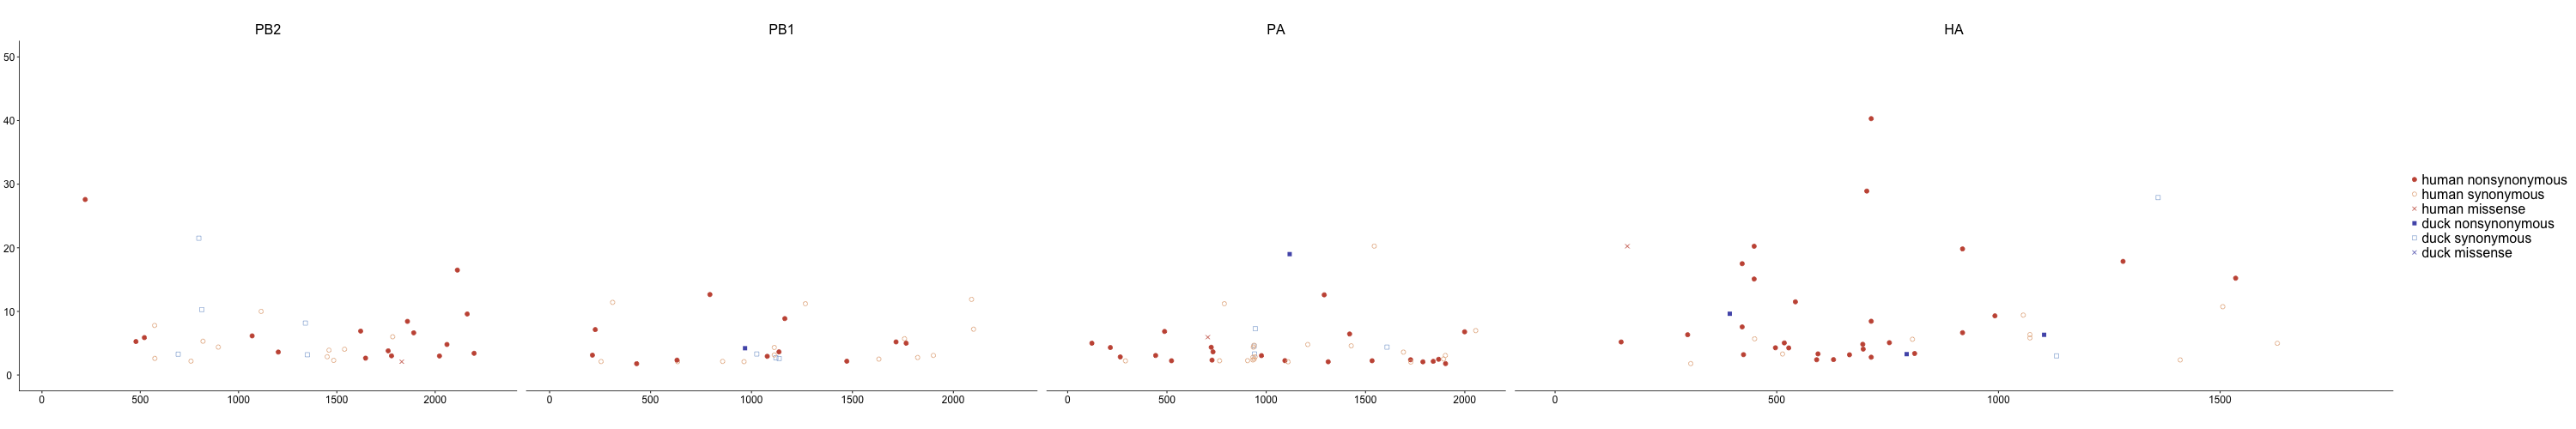

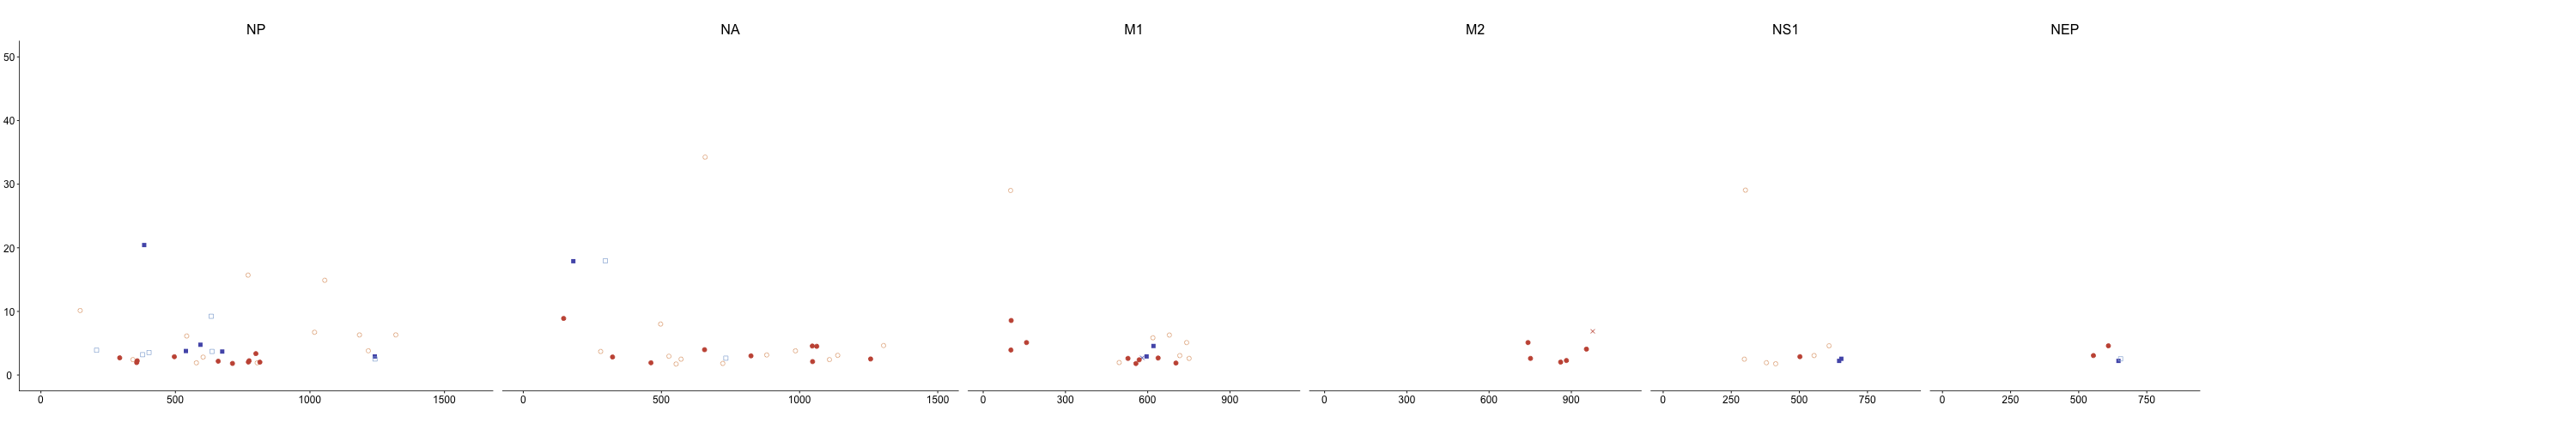

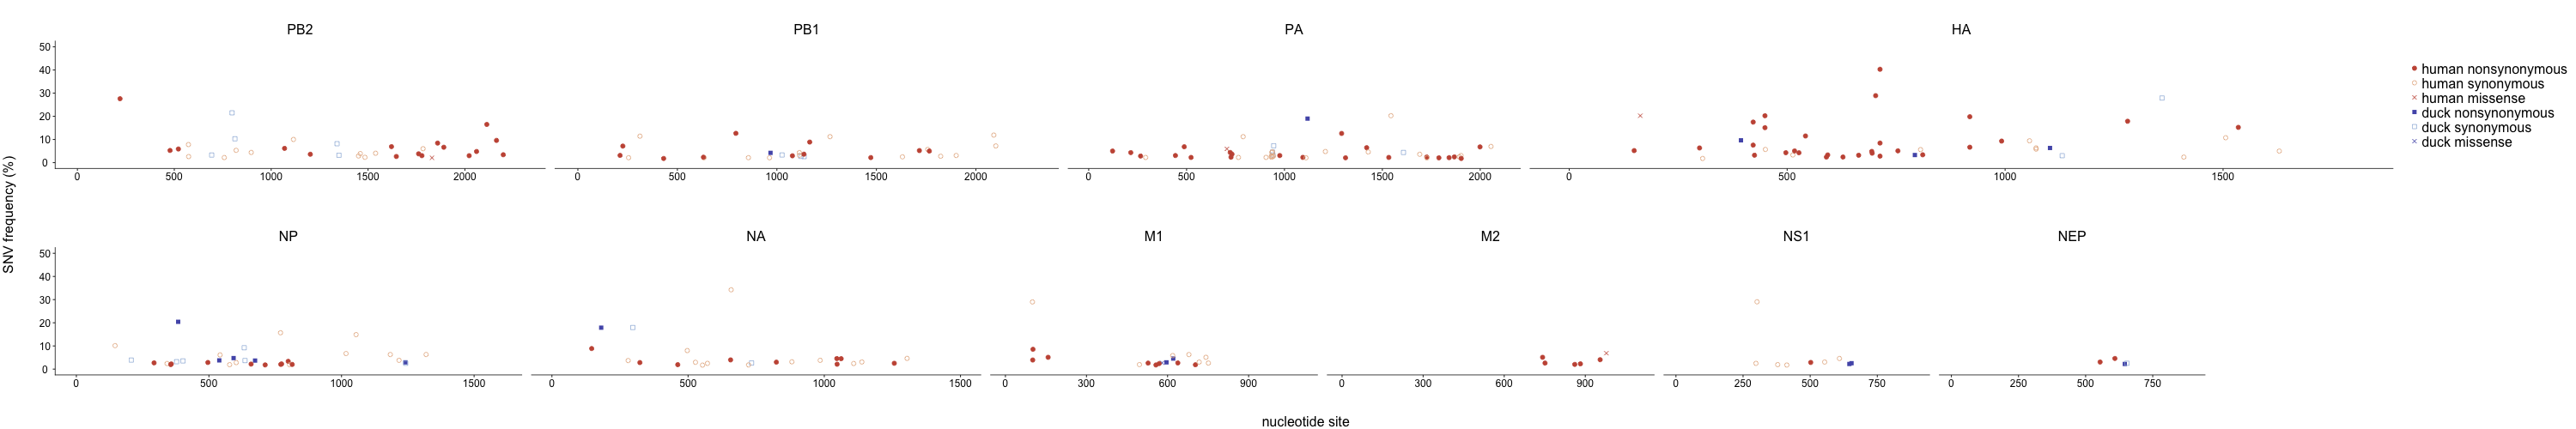

In [87]:
%%R -w 3000 -h 500 -u px -i snps_df,human_nonsyn_color,human_syn_color,duck_nonsyn_color,duck_syn_color  # this sets the size of the plot...otherwise, it will go off the page"

require(ggplot2)
library(ggplot2)
require(grid)
library(grid)
require(gridExtra)
library(gridExtra)
        
snps_df$gene = gsub("neuraminidase","NA", snps_df$gene)
snps_df$gene_f = factor(snps_df$gene, levels=c('PB2','PB1','PA','HA','NP','NA','M1','M2','NS1','NEP'))

blank_data <- data.frame(gene_f = c("PB2","PB2","PB1","PB1","PA","PA","HA","HA","NP","NP","NA","NA","M1","M1","M2","M2","NS1","NS1","NEP","NEP"), x = c(0,2500,0,2500,0,2500,0,1800,0,1600,0,1500,0,1200,0,1200,0,1000,0,1000), y = 0, synonymous_nonsynonymous="nonsynonymous",species='duck',color=c('duck_missense'))

snps_df$color = gsub("stop_gained","missense", snps_df$color)

genes = c('PB2','PB1','PA','NP','NA','M1','M2','NS1','NEP')
stops = list('PB2'=2300,'PB1'=2300,'PA'=2100,'HA'=1800,'NP'=1600,'NA'=1500,'M1'=1100,'M2'=1100,'NS1'=900,'NEP'=900)
plots = list()

for (g in genes)
{
    df = snps_df[snps_df$gene == g,]
    stop = stops[[g]]
    name = paste(g, "plot",sep = '_')
    
    # set PB2 and NP-specific y-axis aesthetics
    if (g == "PB2"| g == 'NP'){
        y_aesthetics = theme(axis.line.y=element_line(colour="black"))+
        theme(axis.text.y=element_text(hjust=0.5))            
    } else {
        y_aesthetics = theme(axis.line.y=element_blank())+
        theme(axis.ticks.y= element_blank())+
        theme(axis.text.y=element_blank())
    }
        
    p <- ggplot(df, aes(x=reference_position, y=frequency*100, shape=color, colour=color))+
        geom_point(size=2)+
        geom_blank(data = blank_data, aes(x = x, y = y))+
        theme(panel.grid.major=element_line(colour=NA,size=NA))+
        theme(panel.grid.minor=element_line(colour=NA,size=NA))+
        theme(plot.title=element_text(size=16, hjust=0.5))+
        theme(strip.background = element_rect(colour=NA, fill=NA))+
        theme(plot.margin=unit(c(1,0.15,1,0.15),"cm"))+    # this sets the plot margins as top, left, bottom, right
        theme(axis.line.x=element_line(colour="black"))+
        theme(strip.text.x=element_text(size=13))+
        theme(axis.title.y=element_blank())+#text(size=16, hjust=0.5, vjust=0.5))+
        theme(axis.title.x=element_blank())+#text(size=16, vjust=0.5))+
        theme(axis.text=element_text(size=12, colour="black"))+
        y_aesthetics+
        scale_shape_manual(name="type",values=c(human_nonsynonymous=19, human_synonymous=1,human_missense=4,duck_nonsynonymous = 15, duck_synonymous = 0,duck_missense=4),breaks=c("human_nonsynonymous", "human_synonymous","human_missense","duck_nonsynonymous","duck_synonymous","duck_missense"),labels = c("human nonsynonymous", "human synonymous","human missense","duck nonsynonymous","duck synonymous", "duck missense"), guide=FALSE)+
        scale_color_manual(name="type", values=c(human_nonsynonymous=human_nonsyn_color, human_synonymous=human_syn_color,human_missense=human_nonsyn_color, duck_nonsynonymous = duck_nonsyn_color, duck_synonymous = duck_syn_color, duck_missense=duck_nonsyn_color),breaks = c("human_nonsynonymous", "human_synonymous","human_missense","duck_nonsynonymous","duck_synonymous","duck_missense"),labels = c("human nonsynonymous", "human synonymous","human missense","duck nonsynonymous","duck synonymous", "duck missense"),guide=FALSE)+
        theme(legend.text=element_text(size=16))+
        theme(legend.title=element_blank())+
        theme(panel.margin=unit(1, "lines"))+
        theme(panel.background=element_rect(fill=NA, color=NA))+
        theme(legend.key=element_rect(fill=NA))+
        theme(legend.key.size=unit(0.6, "cm"))+   # alter this to make legend items further apart
        labs(x="\nnucleotide site",y="SNP frequency (%)\n", title=g)+
        theme(legend.direction = 'horizontal', legend.position = 'right')+
        scale_y_continuous(limits=c(0,50))+
        scale_x_continuous(limits=c(0,stop))
    
    plots[[name]] <- p
} 

## add a plot for HA with a legend 
df = snps_df[snps_df$gene == "HA",]
ha <- ggplot(df, aes(x=reference_position, y=frequency*100, shape=color, colour=color))+
    geom_point(size=2)+
    geom_blank(data = blank_data, aes(x = x, y = y))+
    theme(panel.grid.major=element_line(colour=NA,size=NA))+
    theme(panel.grid.minor=element_line(colour=NA,size=NA))+
    theme(plot.title=element_text(size=16, hjust=0.5))+
    theme(strip.background = element_rect(colour=NA, fill=NA))+
    theme(plot.margin=unit(c(1,0.15,1,0.15),"cm"))+    # this sets the plot margins as top, left, bottom, right
    theme(axis.line.x=element_line(colour="black"))+
    theme(strip.text.x=element_text(size=13))+
    theme(axis.title.y=element_blank())+#text(size=16, hjust=0.5, vjust=0.5))+
    theme(axis.title.x=element_blank())+#text(size=16, vjust=0.5))+
    theme(axis.text=element_text(size=12, colour="black"))+
    theme(axis.line.y=element_blank())+
    theme(axis.ticks.y= element_blank())+
    theme(axis.text.y=element_blank())+
    scale_shape_manual(name="type",values=c(human_nonsynonymous=19, human_synonymous=1,human_missense=4,duck_nonsynonymous = 15, duck_synonymous = 0,duck_missense=4),breaks=c("human_nonsynonymous", "human_synonymous","human_missense","duck_nonsynonymous","duck_synonymous","duck_missense"),labels = c("human nonsynonymous", "human synonymous","human missense","duck nonsynonymous","duck synonymous", "duck missense"))+
    scale_color_manual(name="type", values=c(human_nonsynonymous=human_nonsyn_color, human_synonymous=human_syn_color,human_missense=human_nonsyn_color, duck_nonsynonymous = duck_nonsyn_color, duck_synonymous = duck_syn_color, duck_missense=duck_nonsyn_color),breaks = c("human_nonsynonymous", "human_synonymous","human_missense","duck_nonsynonymous","duck_synonymous","duck_missense"),labels = c("human nonsynonymous", "human synonymous","human missense","duck nonsynonymous","duck synonymous", "duck missense"))+
    guides(shape = guide_legend(ncol = 1))+ 
    theme(legend.text=element_text(size=16))+
    theme(legend.title=element_blank())+
    theme(panel.margin=unit(1, "lines"))+
    theme(panel.background=element_rect(fill=NA, color=NA))+
    theme(legend.key=element_rect(fill=NA))+
    theme(legend.key.size=unit(0.6, "cm"))+   # alter this to make legend items further apart
    labs(x="\nnucleotide site",y="SNV frequency (%)\n", title="HA")+
    theme(legend.direction = 'horizontal', legend.position = 'right')+
    scale_y_continuous(limits=c(0,50))+
    scale_x_continuous(limits=c(0,1800))

extra <- ggplot()+theme(panel.background=element_rect(fill=NA, color=NA))

top <- grid.arrange(plots[[1]],plots[[2]],plots[[3]],ha,ncol=4, widths=c(0.2,0.2,0.18,0.41))
bottom <- grid.arrange(plots[[4]],plots[[5]],plots[[6]],plots[[7]],plots[[8]],plots[[9]], extra, ncol=7, widths=c(0.16,0.15,0.11,0.11,0.09,0.09,0.12))
p <- grid.arrange(top, bottom, left = textGrob("SNV frequency (%)\n", gp=gpar(fontsize=16), rot=90), bottom=textGrob("nucleotide site", gp=gpar(fontsize=16)))
#p
ggsave("Fig-1a-all-SNPs-2019-06-04.pdf", p, width = 15, height = 5, path="/Users/lmoncla/Documents/H5N1_Cambodian_outbreak_study/paper-and-figure-drafts/figures-2019-06-04/individual-PDFs")

## Supplementary Figure 3: plot a supplemental figure faceted by gene and sample

For ease of plotting, I need to add in dummy data so that there is a facet for each gene and sample that gets plotted.

In [88]:
snps_df2 = snps_df[["sample","gene","reference_position","synonymous_nonsynonymous","frequency","species","color"]]
snps_df2.head()

,sample,gene,reference_position,synonymous_nonsynonymous,frequency,species,color
0,A/duck/Cambodia/381W11M4/2013,HA,793,nonsynonymous,0.0328,duck,duck_nonsynonymous
1,A/duck/Cambodia/381W11M4/2013,NP,384,nonsynonymous,0.2043,duck,duck_nonsynonymous
2,A/duck/Cambodia/381W11M4/2013,PA,939,synonymous,0.0455,duck,duck_synonymous
3,A/duck/Cambodia/381W11M4/2013,PA,1118,nonsynonymous,0.1900,duck,duck_nonsynonymous
4,A/duck/Cambodia/381W11M4/2013,PA,1608,synonymous,0.0438,duck,duck_synonymous


In [89]:
%%R -w 1000 -h 500 -u px -i snps_df2,human_nonsyn_color,human_syn_color,duck_nonsyn_color,duck_syn_color  # this sets the size of the plot...otherwise, it will go off the page\n",

require(ggplot2)
library(ggplot2)

dummy = "#ffffff"

snps_df2$color = gsub("stop_gained","missense", snps_df2$color)

# this block of code is to ensure that even genes without SNPs get plotted in the facet plot. For each gene and 
# sample, if there are no SNPs in that gene and sample, make a dummy row of data with a SNP at 0% frequency
samples = unique(snps_df2$sample)
gene_list = unique(snps_df2$gene)
for (sample in samples)
{
    for (gene in gene_list)
    {
        x = snps_df2[snps_df2$sample == sample & snps_df2$gene == gene,]
        if (nrow(x) == 0){
            reference_position = 1
            synonymous_nonsynonymous = "synonymous"
            frequency = 0
            species = "dummy"
            color = "dummy"
            row_to_append = data.frame(sample,gene,reference_position, synonymous_nonsynonymous, frequency, species, color)
            snps_df2 = rbind(snps_df2, row_to_append)
        }
    }
}


# this block of code generates a blank data, dataframe that can be used to set the x limits on the facet plot
blank_data = data.frame()

samples = unique(snps_df2$sample)
gene_list = unique(snps_df2$gene)

# first, add in the 0/start lines
for (sample in samples)
{
    for (gene in gene_list)
    {
        x = 0
        y = 0
        a = data.frame(sample, gene, x, y)
        blank_data = rbind(blank_data, a)
    }
}

# then add in the stop lines 
for (sample in samples)
{
    for (gene in gene_list)
    {
        y = 0
        if (gene == "PB2" | gene == "PB1" | gene == "PA"){
            x = 2500
        } 
        if (gene == "HA" | gene == "NP"){
            x = 2000
        }
        if (gene == "NA"){
            x = 1500
        }
        if (gene == "M1" | gene == "M2"){
            x = 1200
        }
        if (gene == "NS1" | gene == "NEP"){
            x = 1000
        }
        
        a = data.frame(sample, gene, x, y)
        blank_data = rbind(blank_data, a)
    }
}

### Now plot
snps_df2$gene = gsub("neuraminidase","NA", snps_df2$gene)
snps_df2$gene_f = factor(snps_df2$gene, levels=c('PB2','PB1','PA','HA','NP','NA','M1','M2','NS1','NEP'))
blank_data$gene = gsub("neuraminidase","NA", blank_data$gene)
blank_data$gene_f = factor(blank_data$gene, levels=c('PB2','PB1','PA','HA','NP','NA','M1','M2','NS1','NEP'))

Sp <- ggplot(snps_df2, aes(x=reference_position, y=frequency, shape=color, colour=color))+
        geom_point(size=3)+
        geom_blank(data = blank_data, aes(x = x, y = y))+
        #geom_blank(data = blank_data, aes(x = x, y = y))+
        facet_wrap(sample~gene_f, scales="free", ncol=10)+
        theme(panel.grid.major=element_line(colour=NA,size=NA))+
        theme(panel.grid.minor=element_line(colour=NA,size=NA))+
        theme(plot.title=element_text(size=13))+
        theme(strip.background = element_rect(colour=NA, fill=NA))+
        theme(plot.margin=unit(c(1,1,1,1),"cm"))+
        theme(axis.line.x=element_line(colour="black"))+
        theme(axis.line.y=element_line(colour="black"))+
        theme(strip.text.x=element_text(size=13))+
        theme(axis.title.y=element_text(size=16, hjust=0.5, vjust=0.5))+
        theme(axis.title.x=element_text(size=16, vjust=0.5))+
        theme(axis.text=element_text(size=12, colour="black"))+
        theme(axis.text.x=element_text(hjust=0.5))+
        theme(legend.text=element_text(size=16))+
        theme(legend.title=element_blank())+
        theme(panel.margin=unit(1, "lines"))+
        theme(panel.background=element_rect(fill=NA, color=NA))+
        theme(legend.key=element_rect(fill=NA))+
        theme(legend.key.size=unit(0.6, "cm"))+   # alter this to make legend items further apart
        labs(x="\nnucleotide site",y="SNP frequency\n")+
        scale_shape_manual(name="type",values=c(dummy=1, human_nonsynonymous=19, human_synonymous=1,human_missense=4,duck_nonsynonymous = 15, duck_synonymous = 0,duck_missense=4),breaks=c("human_nonsynonymous", "human_synonymous","human_missense","duck_nonsynonymous","duck_synonymous","duck_missense"),labels = c("human nonsynonymous", "human synonymous","human missense","duck nonsynonymous","duck synonymous", "duck missense"))+
        scale_color_manual(name="type", values=c(human_nonsynonymous=human_nonsyn_color, human_synonymous=human_syn_color,human_missense=human_nonsyn_color, duck_nonsynonymous = duck_nonsyn_color, duck_synonymous = duck_syn_color, duck_missense=duck_nonsyn_color, dummy=dummy),breaks = c("human_nonsynonymous", "human_synonymous","human_missense","duck_nonsynonymous","duck_synonymous","duck_missense"),labels = c("human nonsynonymous", "human synonymous","human missense","duck nonsynonymous","duck synonymous", "duck missense"))+
        guides(shape = guide_legend(ncol = 1))+ 
        theme(legend.direction = 'horizontal', legend.position = 'right')+
        scale_y_continuous(limits=c(0,0.5))+
        scale_x_continuous(expand = c(0, 0))+
        expand_limits(x = 0)

ggsave("Fig-S3-all-SNPs-2019-06-04.pdf", Sp, width = 40, height = 30, path="/Users/lmoncla/Documents/H5N1_Cambodian_outbreak_study/paper-and-figure-drafts/figures-2019-06-04/individual-PDFs")

/Users/lmoncla/anaconda/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)


## Figure 1b: Frequency spectrum 

Plot the proportion of within-host variants that fall into different frequency bins. Calculate these proportions for each individual sample, and then plot the mean with error bars. 

In [11]:
# assign bins to each SNP frequency value 
snps_df['bin'] = 'not done yet'
snps_df['bin'][snps_df['frequency'] <= 0.1] = '1-10%'
snps_df['bin'][(snps_df['frequency'] > 0.1) & (snps_df['frequency'] <= 0.2)] = '10-20%'
snps_df['bin'][(snps_df['frequency'] > 0.2) & (snps_df['frequency'] <= 0.3)] = '20-30%'
snps_df['bin'][(snps_df['frequency'] > 0.3) & (snps_df['frequency'] <= 0.4)] = '30-40%'
snps_df['bin'][(snps_df['frequency'] > 0.4) & (snps_df['frequency'] <= 0.5)] = '40-50%'
snps_df.head()

/Users/lmoncla/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/lmoncla/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/lmoncla/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """

,sampleid,sample,gene,reference_position,reference_allele,variant_allele,coding_region_change,synonymous_nonsynonymous,frequency(%),frequency,Unnamed: 10,species,color,bin
0,AJJ9KL706F510_A_duck_Cambodia_381W11M4_2013_H5,A/duck/Cambodia/381W11M4/2013,HA,793,G,A,Ala265Thr,nonsynonymous,3.28%,0.0328,NaN,duck,duck_nonsynonymous,1-10%
1,AJJ9KL706F510_A_duck_Cambodia_381W11M4_2013_NP,A/duck/Cambodia/381W11M4/2013,NP,384,A,G,Gln117Arg,nonsynonymous,20.43%,0.2043,NaN,duck,duck_nonsynonymous,20-30%
2,AJJ9KL706F510_A_duck_Cambodia_381W11M4_2013_PA,A/duck/Cambodia/381W11M4/2013,PA,939,A,G,Ala307Ala,synonymous,4.55%,0.0455,NaN,duck,duck_synonymous,1-10%
3,AJJ9KL706F510_A_duck_Cambodia_381W11M4_2013_PA,A/duck/Cambodia/381W11M4/2013,PA,1118,G,A,Arg367Lys,nonsynonymous,19%,0.1900,NaN,duck,duck_nonsynonymous,10-20%
4,AJJ9KL706F510_A_duck_Cambodia_381W11M4_2013_PA,A/duck/Cambodia/381W11M4/2013,PA,1608,G,A,Pro530Pro,synonymous,4.38%,0.0438,NaN,duck,duck_synonymous,1-10%


In [12]:
# subset dataframe, and count the number of instances of SNPs in each bin for each species
freq_spec = snps_df[['sample','bin','species']]
freq_spec = pd.DataFrame(freq_spec.groupby(["species", "bin"]).size())
freq_spec.reset_index(inplace=True)
freq_spec.columns = ['species','bin','count']
freq_spec.loc[len(freq_spec)] = ['duck','30-40',0]
freq_spec.loc[len(freq_spec)] = ['duck','40-50',0]
freq_spec.loc[len(freq_spec)] = ['human','40-50',0]
freq_spec

,species,bin,count
0,duck,1-10%,33
1,duck,10-20%,4
2,duck,20-30%,3
3,human,1-10%,180
4,human,10-20%,17
5,human,20-30%,7
6,human,30-40%,1
7,human,40-50%,1
8,duck,30-40,0
9,duck,40-50,0


In [13]:
# calculate the total number of duck and human SNPs
total_duck = freq_spec[freq_spec['species'] == 'duck']
total_duck_snps = sum(total_duck['count'])
total_human = freq_spec[freq_spec['species'] == 'human']
total_human_snps = sum(total_human['count'])

total_duck['proportion'] = (total_duck['count'])/total_duck_snps
total_human['proportion'] = (total_human['count'])/total_human_snps
freq_spec = total_duck.append(total_human)
freq_spec

/Users/lmoncla/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/lmoncla/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,species,bin,count,proportion
0,duck,1-10%,33,0.825000
1,duck,10-20%,4,0.100000
2,duck,20-30%,3,0.075000
8,duck,30-40,0,0.000000
9,duck,40-50,0,0.000000
3,human,1-10%,180,0.873786
4,human,10-20%,17,0.082524
5,human,20-30%,7,0.033981
6,human,30-40%,1,0.004854
7,human,40-50%,1,0.004854


## Figure 1b: Frequency spectrum (counts and proportions) of synonymous and nonsynonymous SNPs

In [14]:
# subset dataframe, and count the number of instances of SNPs in each bin for each species
freq_spec2 = snps_df[['sample','bin','species','synonymous_nonsynonymous']]
freq_spec2 = freq_spec2[freq_spec2['synonymous_nonsynonymous'] != "stop_gained"]
freq_spec2.head()

,sample,bin,species,synonymous_nonsynonymous
0,A/duck/Cambodia/381W11M4/2013,1-10%,duck,nonsynonymous
1,A/duck/Cambodia/381W11M4/2013,20-30%,duck,nonsynonymous
2,A/duck/Cambodia/381W11M4/2013,1-10%,duck,synonymous
3,A/duck/Cambodia/381W11M4/2013,10-20%,duck,nonsynonymous
4,A/duck/Cambodia/381W11M4/2013,1-10%,duck,synonymous


In [94]:
# count number of instances 
freq_spec3 = pd.DataFrame(freq_spec2.groupby(["sample", 'species',"bin", "synonymous_nonsynonymous"]).size())
freq_spec3.reset_index(inplace=True)
freq_spec3.columns = ['sample','species','bin','syn_nonsyn','count']

freq_spec3.head()

,sample,species,bin,syn_nonsyn,count
0,A/CAMBODIA/V0401301/2011,human,1-10%,nonsynonymous,34
1,A/CAMBODIA/V0401301/2011,human,1-10%,synonymous,16
2,A/CAMBODIA/V0401301/2011,human,10-20%,nonsynonymous,1
3,A/CAMBODIA/V0401301/2011,human,10-20%,synonymous,1
4,A/CAMBODIA/V0401301/2011,human,20-30%,nonsynonymous,1


In [95]:
# add in missing rows for bins with 0 SNPs
samples = set(freq_spec3['sample'].tolist())
bins = ['1-10%', '10-20%', '20-30%', '30-40%','40-50%']
syn_nonsyn = ['synonymous','nonsynonymous']
freq_spec4 = pd.DataFrame()

for s in samples: 
    if 'duck' in s.lower():
        species = "duck"
    else:
        species = "human"
    for b in bins:
        for i in syn_nonsyn:
            x = freq_spec3[(freq_spec3['sample'] == s) & (freq_spec3['bin'] == b) & (freq_spec3['syn_nonsyn'] == i)]
            if len(x) == 0:
                d = {'sample': [s], 'species':[species],'bin': [b], 'syn_nonsyn':[i], 'count':[0]}
                a = pd.DataFrame(d)
                freq_spec3 = freq_spec3.append(a)

freq_spec3.head()

,sample,species,bin,syn_nonsyn,count
0,A/CAMBODIA/V0401301/2011,human,1-10%,nonsynonymous,34
1,A/CAMBODIA/V0401301/2011,human,1-10%,synonymous,16
2,A/CAMBODIA/V0401301/2011,human,10-20%,nonsynonymous,1
3,A/CAMBODIA/V0401301/2011,human,10-20%,synonymous,1
4,A/CAMBODIA/V0401301/2011,human,20-30%,nonsynonymous,1


In [96]:
# add in proportions
samples = set(freq_spec3['sample'].tolist())

freq_spec4 = pd.DataFrame()

for s in samples: 
    x = freq_spec3[freq_spec3['sample'] == s]
    NS = x[x['syn_nonsyn'] == "nonsynonymous"]
    nNS = sum(NS['count'])
    S = x[x['syn_nonsyn'] == 'synonymous']
    nS = sum(S['count'])
    
    # make a new dataframe column for the proportion
    NS['proportion'] = NS['count']/nNS
    S['proportion'] = S['count']/nS

    freq_spec4 = freq_spec4.append(NS)
    freq_spec4 = freq_spec4.append(S)
    
freq_spec4.head()

/Users/lmoncla/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/lmoncla/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,sample,species,bin,syn_nonsyn,count,proportion
10,A/Cambodia/W0112303/2012,human,1-10%,nonsynonymous,6,0.857143
12,A/Cambodia/W0112303/2012,human,10-20%,nonsynonymous,1,0.142857
0,A/Cambodia/W0112303/2012,human,20-30%,nonsynonymous,0,0.000000
0,A/Cambodia/W0112303/2012,human,30-40%,nonsynonymous,0,0.000000
0,A/Cambodia/W0112303/2012,human,40-50%,nonsynonymous,0,0.000000


In [97]:
# transform into a dataframe with the mean proportion of snps in each bin for each species, with error bars 
human = freq_spec4[freq_spec4['species'] == 'human']
human_means = pd.DataFrame(human.groupby(['species',"bin", "syn_nonsyn"]).mean())
human_means.reset_index(inplace=True)
human_means.columns = ['species','bin','syn_nonsyn','mean_count','mean_proportion']
human_stds = pd.DataFrame(human.groupby(['species',"bin", "syn_nonsyn"]).std())
human_stds.reset_index(inplace=True)
human_stds.columns = ['species','bin','syn_nonsyn','std_count','std_proportion']

human = human_means.merge(human_stds, on=['species','bin','syn_nonsyn'])

duck = freq_spec4[freq_spec4['species'] == 'duck']
duck_means = pd.DataFrame(duck.groupby(['species',"bin", "syn_nonsyn"]).mean())
duck_means.reset_index(inplace=True)
duck_means.columns = ['species','bin','syn_nonsyn','mean_count','mean_proportion']
duck_stds = pd.DataFrame(duck.groupby(['species',"bin", "syn_nonsyn"]).std())
duck_stds.reset_index(inplace=True)
duck_stds.columns = ['species','bin','syn_nonsyn','std_count','std_proportion']

duck = duck_means.merge(duck_stds, on=['species','bin','syn_nonsyn'])
duck.head()

,species,bin,syn_nonsyn,mean_count,mean_proportion,std_count,std_proportion
0,duck,1-10%,nonsynonymous,2.6,0.850000,1.140175,0.223607
1,duck,1-10%,synonymous,3.8,0.838095,1.483240,0.167006
2,duck,10-20%,nonsynonymous,0.4,0.100000,0.547723,0.136931
3,duck,10-20%,synonymous,0.4,0.100000,0.547723,0.149071
4,duck,20-30%,nonsynonymous,0.2,0.050000,0.447214,0.111803


In [98]:
freq_spec5 = human.append(duck)
freq_spec5.head()

,species,bin,syn_nonsyn,mean_count,mean_proportion,std_count,std_proportion
0,human,1-10%,nonsynonymous,12.250,0.873936,12.032694,0.105702
1,human,1-10%,synonymous,9.875,0.869459,5.591767,0.127899
2,human,10-20%,nonsynonymous,1.125,0.093804,0.991031,0.081250
3,human,10-20%,synonymous,1.000,0.085986,0.755929,0.080149
4,human,20-30%,nonsynonymous,0.375,0.019760,0.517549,0.034982


In [99]:
freq_spec5['color'] = freq_spec5['species'] + "_" + freq_spec5['syn_nonsyn']
freq_spec5

,species,bin,syn_nonsyn,mean_count,mean_proportion,std_count,std_proportion,color
0,human,1-10%,nonsynonymous,12.250,0.873936,12.032694,0.105702,human_nonsynonymous
1,human,1-10%,synonymous,9.875,0.869459,5.591767,0.127899,human_synonymous
2,human,10-20%,nonsynonymous,1.125,0.093804,0.991031,0.081250,human_nonsynonymous
3,human,10-20%,synonymous,1.000,0.085986,0.755929,0.080149,human_synonymous
4,human,20-30%,nonsynonymous,0.375,0.019760,0.517549,0.034982,human_nonsynonymous
5,human,20-30%,synonymous,0.375,0.028930,0.517549,0.045759,human_synonymous
6,human,30-40%,nonsynonymous,0.000,0.000000,0.000000,0.000000,human_nonsynonymous
7,human,30-40%,synonymous,0.125,0.015625,0.353553,0.044194,human_synonymous
8,human,40-50%,nonsynonymous,0.125,0.012500,0.353553,0.035355,human_nonsynonymous
9,human,40-50%,synonymous,0.000,0.000000,0.000000,0.000000,human_synonymous


In [100]:
%%R -w 1000 -h 500 -u px -i freq_spec5,duck_nonsyn_color,duck_syn_color,human_nonsyn_color,human_syn_color  # this sets the size of the plot...otherwise, it will go off the page\n",
require(ggplot2)
library(ggplot2)

freq_spec5$speciesf = factor(freq_spec5$species, levels=c("human","duck"))
freq_spec5$colorf = factor(freq_spec5$color, levels=c("human_nonsynonymous","human_synonymous","duck_nonsynonymous","duck_synonymous"))

p3 <- ggplot(freq_spec5, aes(x=bin, y=mean_proportion, colour=colorf, fill=colorf))+
        geom_col(position="dodge")+
        geom_errorbar(data=freq_spec5, aes(x=bin, ymin = mean_proportion - std_proportion, ymax = mean_proportion + std_proportion),position="dodge")+
        theme(panel.grid.major=element_line(colour=NA,size=NA))+
        theme(panel.grid.minor=element_line(colour=NA,size=NA))+
        theme(plot.title=element_text(size=13))+
        theme(strip.background = element_rect(colour=NA, fill=NA))+
        theme(plot.margin=unit(c(1,1,1,1),"cm"))+
        theme(axis.line.x=element_line(colour="black"))+
        theme(axis.line.y=element_line(colour="black"))+
        theme(strip.text.x=element_text(size=13))+
        theme(axis.title.y=element_text(size=16, hjust=0.5, vjust=0.5))+
        theme(axis.title.x=element_text(size=16, vjust=0.5))+
        theme(axis.text=element_text(size=13, colour="black"))+
        theme(axis.text.x=element_text(hjust=0.5))+
        theme(legend.text=element_text(size=16))+
        theme(legend.title=element_blank())+
        theme(panel.margin=unit(1, "lines"))+
        theme(legend.key.size=unit(0.55, "cm"))+
        theme(panel.background=element_rect(fill=NA))+
        theme(legend.key=element_rect(fill=NA))+
        labs(x="\nwithin-host SNV frequency",y="proportion of SNVs\n")+
        scale_y_continuous(limits=c(-0.1,1.2), breaks=seq(0,1.2,0.2))+
        scale_shape_manual(values=c(19,4,1))+
        scale_color_manual(values=c(human_nonsynonymous=human_nonsyn_color, human_synonymous=human_syn_color,duck_nonsynonymous = duck_nonsyn_color, duck_synonymous = duck_syn_color),breaks = c("human_nonsynonymous", "human_synonymous","duck_nonsynonymous","duck_synonymous"),labels = c(" human nonsynonymous", " human synonymous"," duck nonsynonymous"," duck synonymous"))+
        scale_fill_manual(values=c(human_nonsynonymous=human_nonsyn_color, human_synonymous=human_syn_color,duck_nonsynonymous = duck_nonsyn_color, duck_synonymous = duck_syn_color),breaks = c("human_nonsynonymous", "human_synonymous","duck_nonsynonymous","duck_synonymous"),labels = c(" human nonsynonymous", " human synonymous"," duck nonsynonymous"," duck synonymous"))

p3
ggsave("Fig-1b-freq-spectrum-2019-06-04.pdf", p3, width = 9, height = 4, path="/Users/lmoncla/Documents/H5N1_Cambodian_outbreak_study/paper-and-figure-drafts/figures-2019-06-04/individual-PDFs")

/Users/lmoncla/anaconda/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)


## SNP summary statistics

### Total number of different types of SNVs in humans and ducks 

In [120]:
h = snps_df[snps_df['species'] == "human"] 
print(len(h[h['synonymous_nonsynonymous']=='nonsynonymous']))
print(len(h[h['synonymous_nonsynonymous']=='synonymous']))
print(len(h[h['synonymous_nonsynonymous']=='stop_gained']))

111
91
4


In [121]:
d = snps_df[snps_df['species'] == "duck"] 
print(len(d[d['synonymous_nonsynonymous']=='nonsynonymous']))
print(len(d[d['synonymous_nonsynonymous']=='synonymous']))
print(len(d[d['synonymous_nonsynonymous']=='stop_gained']))

16
23
1


### Total number of unique SNPs in humans and ducks 

In [115]:
snps_df['nt_change'] = snps_df['gene'] + snps_df['reference_position'].astype(str) + snps_df['variant_allele']
human = snps_df[snps_df['species'] == "human"]
duck = snps_df[snps_df['species'] == "duck"]

len(set(duck['nt_change'])), len(set(human['nt_change']))

(40, 198)

In [116]:
snps_df['aa_site'] = snps_df['gene']+snps_df['coding_region_change'].replace('([A-z]+)', '', regex=True)
human = snps_df[snps_df['species'] == "human"]
duck = snps_df[snps_df['species'] == "duck"]

human.head()

,sampleid,sample,gene,reference_position,reference_allele,variant_allele,coding_region_change,synonymous_nonsynonymous,frequency(%),frequency,Unnamed: 10,species,color,bin,nt_change,aa_site
41,AA4KNL706F512_A_Cambodia_X0128304_2013_H5,A/Cambodia/X0128304/2013,HA,149,C,T,Thr41Ile,nonsynonymous,5.19%,0.0519,NaN,human,human_nonsynonymous,1-10%,HA149T,HA41
42,AA4KNL706F512_A_Cambodia_X0128304_2013_H5,A/Cambodia/X0128304/2013,HA,163,C,T,Gln46Stop,stop_gained,20.24%,0.2024,NaN,human,human_stop_gained,20-30%,HA163T,HA46
43,AA4KNL706F512_A_Cambodia_X0128304_2013_H5,A/Cambodia/X0128304/2013,HA,299,A,G,Glu91Gly,nonsynonymous,6.33%,0.0633,NaN,human,human_nonsynonymous,1-10%,HA299G,HA91
44,AA4KNL706F512_A_Cambodia_X0128304_2013_H5,A/Cambodia/X0128304/2013,HA,450,T,C,His141His,synonymous,5.69%,0.0569,NaN,human,human_synonymous,1-10%,HA450C,HA141
45,AA4KNL706F512_A_Cambodia_X0128304_2013_H5,A/Cambodia/X0128304/2013,HA,542,A,C,Lys172Thr,nonsynonymous,11.5%,0.1150,NaN,human,human_nonsynonymous,10-20%,HA542C,HA172


In [117]:
len(set(duck['aa_site'])), len(set(human['aa_site']))

(34, 188)

In [124]:
len(set(snps_df['aa_site']))

218

### Mean number of SNPs per sample for humans and ducks

In [114]:
# count the mean number of SNPs per sample for humans and ducks
mean_number_snps = pd.DataFrame(snps_df.groupby(["species", "sample"]).size())
mean_number_snps.reset_index(inplace=True)
mean_number_snps.columns = ['species','sample','number']

mean_snps_duck = mean_number_snps[mean_number_snps['species']=='duck']['number'].mean()
std_snps_duck = mean_number_snps[mean_number_snps['species']=='duck']['number'].std()

mean_snps_human = mean_number_snps[mean_number_snps['species']=='human']['number'].mean()
std_snps_human = mean_number_snps[mean_number_snps['species']=='human']['number'].std()

mean_snps_duck, std_snps_duck, mean_snps_human, std_snps_human

(8.0, 2.7386127875258306, 25.75, 18.96425208498498)

### Mean SNP frequencies for humans and ducks

In [101]:
### Mean number of SNPs per sample for humans and ducks

# count the mean number of SNPs per sample for humans and ducks
mean_number_snps = pd.DataFrame(snps_df.groupby(["species", "sample"]).size())
mean_number_snps.reset_index(inplace=True)
mean_number_snps.columns = ['species','sample','number']

mean_snps_duck = mean_number_snps[mean_number_snps['species']=='duck']['number'].mean()
std_snps_duck = mean_number_snps[mean_number_snps['species']=='duck']['number'].std()

mean_snps_human = mean_number_snps[mean_number_snps['species']=='human']['number'].mean()
std_snps_human = mean_number_snps[mean_number_snps['species']=='human']['number'].std()

mean_snps_duck, std_snps_duck, mean_snps_human, std_snps_human# calculate the mean and standard deviation SNP frequency for ducks
mean_snp_freq_duck = snps_df[snps_df['species'] == 'duck']['frequency'].mean()
std_snp_freq_duck = snps_df[snps_df['species'] == 'duck']['frequency'].std()
mean_snp_freq_duck, std_snp_freq_duck

(0.06692999999999999, 0.06465251180001658)

In [102]:
# calculate the mean and standard deviation SNP frequency for humans
mean_snp_freq_human = snps_df[snps_df['species'] == 'human']['frequency'].mean()
std_snp_freq_human = snps_df[snps_df['species'] == 'human']['frequency'].std()
mean_snp_freq_human, std_snp_freq_human

(0.057968932038834964, 0.05959261704005928)

#### T-test to compare whether humans and ducks have different SNP frequencies on average

In [105]:
a = snps_df[snps_df['species'] == 'duck']
a = a['frequency']
b = snps_df[snps_df['species'] == 'human']
b = b['frequency']
stats.ttest_ind(a, b, axis=0, equal_var=False)

Ttest_indResult(statistic=0.8121698412122093, pvalue=0.420350777870221)

#### Mann Whitney U test to compare differences in SNP frequencies 

Trevor suggested using this test instead of an unpaired t-test, because clearly our data are not normally distributed. 

In [107]:
# this runs the mann whitney u test
stats.mannwhitneyu(a, b)

MannwhitneyuResult(statistic=3613.0, pvalue=0.10936982766332526)

### Mean SNP frequencies for NS and S SNPs per species

In [108]:
# calculate the mean and standard deviation SNP frequency for ducks
mean_snp_freq_NS_duck = snps_df[(snps_df['species'] == 'duck') & (snps_df['synonymous_nonsynonymous'] == 'nonsynonymous')]['frequency'].mean()
mean_snp_freq_S_duck = snps_df[(snps_df['species'] == 'duck') & (snps_df['synonymous_nonsynonymous'] == 'synonymous')]['frequency'].mean()
std_snp_freq_NS_duck = snps_df[(snps_df['species'] == 'duck') & (snps_df['synonymous_nonsynonymous'] == 'nonsynonymous')]['frequency'].std()
std_snp_freq_S_duck = snps_df[(snps_df['species'] == 'duck') & (snps_df['synonymous_nonsynonymous'] == 'synonymous')]['frequency'].std()

mean_snp_freq_NS_duck, mean_snp_freq_S_duck, std_snp_freq_NS_duck, std_snp_freq_S_duck

(0.06898125, 0.0672391304347826, 0.06340058063614244, 0.06777620753848947)

In [109]:
# calculate the mean and standard deviation SNP frequency for humans
mean_snp_freq_NS_human = snps_df[(snps_df['species'] == 'human') & (snps_df['synonymous_nonsynonymous'] == 'nonsynonymous')]['frequency'].mean()
mean_snp_freq_S_human = snps_df[(snps_df['species'] == 'human') & (snps_df['synonymous_nonsynonymous'] == 'synonymous')]['frequency'].mean()
std_snp_freq_NS_human = snps_df[(snps_df['species'] == 'human') & (snps_df['synonymous_nonsynonymous'] == 'nonsynonymous')]['frequency'].std()
std_snp_freq_S_human = snps_df[(snps_df['species'] == 'human') & (snps_df['synonymous_nonsynonymous'] == 'synonymous')]['frequency'].std()

mean_snp_freq_NS_human, mean_snp_freq_S_human, std_snp_freq_NS_human, std_snp_freq_S_human

(0.05806666666666664,
 0.05653626373626373,
 0.06047226161011695,
 0.05804352105960093)

### Rerun, this time comparing human vs duck separated by synonymous and nonsynonymous

In [110]:
c = snps_df[snps_df['species'] == 'duck']
c = c[c['synonymous_nonsynonymous'] == 'nonsynonymous']
c = c['frequency']
d = snps_df[snps_df['species'] == 'human']
d = d[d['synonymous_nonsynonymous'] == 'nonsynonymous']
d = d['frequency']
stats.ttest_ind(c,d, axis=0, equal_var=False)

Ttest_indResult(statistic=0.6474652217803504, pvalue=0.5250186563058638)

In [111]:
# this runs the mann whitney u test
stats.mannwhitneyu(c,d)

MannwhitneyuResult(statistic=771.5, pvalue=0.1996659218159199)

In [112]:
e = snps_df[snps_df['species'] == 'duck']
e = e[e['synonymous_nonsynonymous'] == 'synonymous']
e = e['frequency']
f = snps_df[snps_df['species'] == 'human']
f = f[f['synonymous_nonsynonymous'] == 'synonymous']
f = f['frequency']
stats.ttest_ind(e,f, axis=0, equal_var=False)

Ttest_indResult(statistic=0.6956003747980034, pvalue=0.49191923568183327)

In [113]:
# this runs the mann whitney u test
stats.mannwhitneyu(d,f)

MannwhitneyuResult(statistic=4979.0, pvalue=0.43181209049022384)